[  0  64  29  38  77  22   7  50  85  12  86  57  56  93  83  35  98   5
  87  34   3  63  44  69  97  95  78  70  53  30  74  88  84  36  40  21
   9  11  73  33  90  42  17  15  76   6  94   8  10  65   2  20  54  18
  23  81  79  89  72  75  99  59  43  62  14  25  27  47  55  26  13  60
  92  52  41  71  80 100  39  58  45  28  48  67  82  37   1  61  66  32
  96  68  31  91  16  49  24  19   4  46  51 101] 
 212671.22615372657
[  0  61   5  74  63   1  64  44  28  91  14  24  86  83  49   2  33  32
  65  73  62  53  98  16  94  88  96  70  46  29  35  54  12   4  18  84
  36  55  51  37  99  71  72  75  60  58   9  87  45  89  21  67  93  90
  39  57  48   6  23  82   8  50  25  40  43  47  69  97  59  10  30  56
  85  27  20  81  79  42  22  41   7  26  95  13  11  15  80  52  17  19
  77  92 100   3  78  31  68  66  38  76  34 101] 
 41408.113818750986


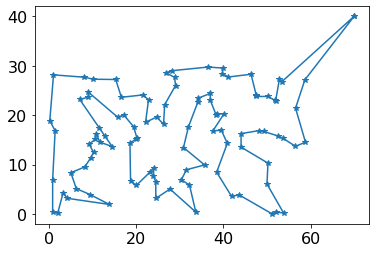

In [7]:
from numpy import loadtxt, radians, sin, cos, inf, exp
from numpy import array, r_, c_, arange, savetxt
from numpy.lib.scimath import arccos
from numpy.random import shuffle, randint, rand
from matplotlib.pyplot import plot, show, rc

a = loadtxt("Pdata17_1.txt")
x = a[:,::2].flatten()
y = a[:,1::2].flatten()

#初始点
d1 = array([[70, 40]])
#路线矩阵
xy = c_[x, y]
xy = r_[d1, xy, d1]

N = xy.shape[0]
t = radians(xy)
#print(t)
d = array([[6370 * arccos(cos(t[i,0] - t[j,0]) * cos(t[i,1]) * cos(t[j,1]) +
            sin(t[i,1]) * sin(t[j,1])) for i in range(N)] 
            for j in range(N)]).real
#把数据保存到文本文件，供下面使用
savetxt('Pdata17_2.txt', c_[xy, d])

path = arange(N)
L = inf
for j in range(1000):
    path0 = arange(1, N-1)
    shuffle(path0)
    path0 = r_[0, path0, N-1]
    L0 = d[0, path0[1]]
    for i in range(1, N-1):
        L0 += d[path0[i], path0[i+1]]
    if L0 < L:
        path = path0
        L =L0
print(path, '\n', L)

e = 0.1 ** 30
M = 20000
at = 0.999
T = 1

for k in range(M):
    c = randint(1, 101, 2)
    c.sort()
    c1 = c[0]
    c2 = c[1]
    df = d[path[c1-1], path[c2]] + d[path[c1], path[c2+1]] \
         - d[path[c1-1], path[c1]] - d[path[c2], path[c2+1]]
    if df < 0:
        path = r_[path[0], path[1:c1], path[c2:c1-1:-1], path[c2+1:102]]
        L = L + df
    else:
        if exp(-df/T) > rand(1):
            path = r_[path[0], path[1:c1], path[c2:c1-1:-1], path[c2+1:102]]
            L = L + df
    T = T * at
    if T < e:
        break
        
#输出巡航路径及路径长度
print(path, '\n', L)
xx = xy[path, 0]
yy = xy[path, 1]
rc('font', size = 16)
#画巡航路径
plot(xx, yy, '-*')
show()
            

